## Complete Case Analysis

Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists of **discarding** observations with **any** missing values. In other words, we only keep observations with data on all the variables.

### Which variables can I impute with CCA?

CCA can be applied to both categorical and numerical variables.

### Assumptions

CCA works well when the data is missing completely at random. In this scenario, excluding observations with missing information would be the same as randomly excluding some observations from the dataset. Therefore, the dataset after CCA remains a fair representation of the original dataset.

### Advantages

- No data manipulation required.

- Preserves variable distribution (assumming data is missing at random).

### Disadvantages

- It can discard a large fraction of the original dataset (if missing data is abundant).

- Excluded observations could be informative (if data is not missing at random).

- CCA will create a biased dataset (i.e., the complete dataset differs from the original data) if the data is not missing at random.

- When using our models in production, the model will not be able to handle missing data.

### When to use CCA

- Data is missing completely at random

- No more than 5% of the total dataset contains missing data

In practice, CCA may be an acceptable method when the proportion of missing information is small. There is no rule of thumb to determine how much missing data is small. However, as general guidance, if the proportion of missing data is <= 5%, CCA could be a viable option.

### Models and CCA in production

When using CCA, we remove all observations with missing information. However, the data that we want to score with our model may indeed contain missing information. This will pose a problem when using our model in production: when an observation contains missing data, the model will not be able to handle it. 

Therefore, when putting models into production, we need to do 1 of 2 things: either we do not score observations with missing data, or we replace the missing values with another value.

## In this demo:

We will use the House Prices dataset to demonstrate how to perform Complete Case Analysis.

- For instructions on how to download the dataset, please refer to the lecture **Download Datasets** in **Section 2** of the course.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# To display all columns of the dataframe.
pd.set_option('display.max_columns', None)

In [2]:
# Let's load the House Prices dataset
# and explore its shape (rows and columns).

data = pd.read_csv('../../houseprice.csv')
data.shape

(1460, 81)

In [3]:
# Let's see the first 5 rows.

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Find the variables with missing observations.

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]

vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
# Let's find out whether they are numerical or categorical.

data[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

There are numerical and categorical variables with missing observations. We can see from the variable types that some are float and some are object.

In [6]:
# Let's have a look at the values of the variables with
# missing data.

data[vars_with_na].head(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [7]:
# Let's find out the proportion of missing observations per variable.

# Calculate the proportion of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas.
data_na = data[vars_with_na].isnull().mean()

# Transform the array into a dataframe.
data_na = pd.DataFrame(data_na.reset_index())

# Add column names to the dataframe.
data_na.columns = ['variable', 'na_fraction']

# Order the dataframe according to proportion of na per variable.
data_na.sort_values(by='na_fraction', ascending=False, inplace=True)

# Show
data_na

,variable,na_fraction
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


The first 6 variables contain a lot of missing information, so we can't use CCA if we consider those variables, because we would discard most of the observations in the dataset. We could use CCA if we omitted those variables.

For this demonstration, I'll skip the first six variables that have a lot of missing data and use CCA on the rest of the dataset.

In [8]:
# Capture variables with less than 5% NA
# in a list.

vars_cca = [var for var in vars_with_na if data[var].isnull().mean() < 0.05]
vars_cca

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [9]:
# Calculate the proportion of observations with complete
# cases: i.e., with values on all the variables.

# The method dropna() discards observations that contain
# any NA.

len(data.dropna(subset=vars_cca)) / len(data)

0.9671232876712329

In [10]:
# Create the complete case dataset,
# in other words, remove observations 
# with na in any variable.

data_cca = data.dropna(subset=vars_cca)

data.shape, data_cca.shape

((1460, 81), (1412, 81))

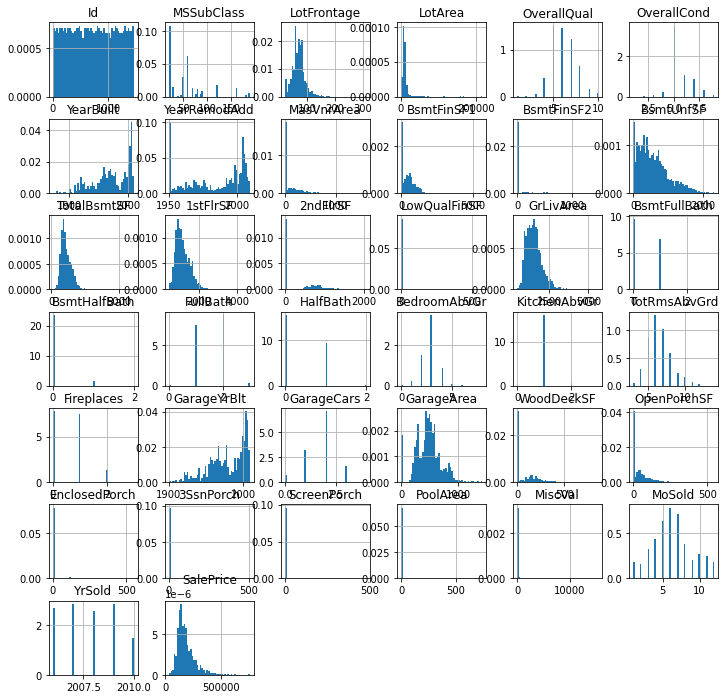

In [11]:
# Plot the histograms for all numerical variables in the complete
# case dataset (as we did in section 3).

data_cca.hist(bins=50, density=True, figsize=(12, 12))

plt.show()

<AxesSubplot: >

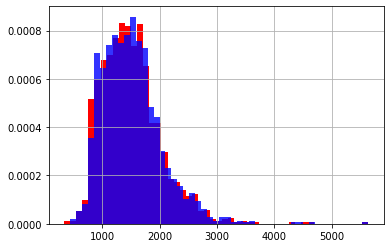

In [12]:
## Let's check the distribution of a few variables before and after 
# cca: histogram.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# Data after cca: the argument "alpha" makes 
# the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot: ylabel='Density'>

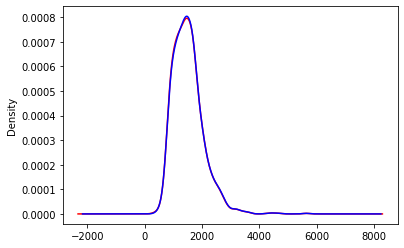

In [13]:
# Let's check the distribution of a few variables before and after 
# cca: density plot.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['GrLivArea'].plot.density(color='red')

# Data after cca.
data_cca['GrLivArea'].plot.density(color='blue')

<AxesSubplot: >

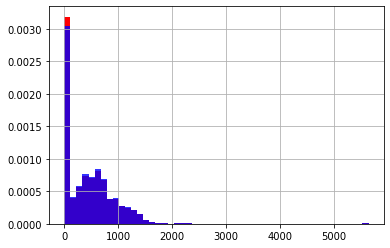

In [14]:
# Let's check the distribution of a few variables before and after 
# cca: histogram.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['BsmtFinSF1'].hist(bins=50, ax=ax, density=True, color='red')

# Data after cca: the argument "alpha" makes 
# the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

data_cca['BsmtFinSF1'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot: ylabel='Density'>

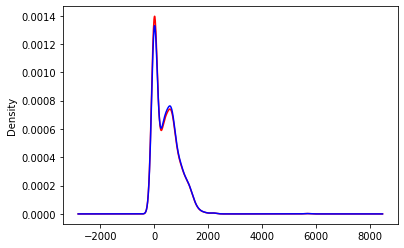

In [15]:
# Let's check the distribution of a few variables before and after 
# cca: density plot.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['BsmtFinSF1'].plot.density(color='red')

# Data after cca.
data_cca['BsmtFinSF1'].plot.density(color='blue')

As we can see from the plots, the distribution of the numerical variables in the original and complete case datasets is very similar, which is what we expect from CCA when data is missing at random.

In the next few cells, I will explore the distribution of categorical variables. To do so, I will evaluate the percentage of observations that show each of the unique categories, as we did in sections 2 and 3 of the course.

In [16]:
# The following function captures the percentage of observations
# per category in the original and complete case datasets
# and puts them together in a new dataframe.


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts(normalize=True),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts(normalize=True)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [17]:
# Run the function in a categorical variable.

categorical_distribution(data, data_cca, 'BsmtQual')

,original,cca
TA,0.456079,0.458924
Gd,0.434294,0.431303
Ex,0.085032,0.084986
Fa,0.024596,0.024788


In [18]:
categorical_distribution(data, data_cca, 'MasVnrType')

,original,cca
None,0.595041,0.588527
BrkFace,0.306474,0.310198
Stone,0.088154,0.090652
BrkCmn,0.010331,0.010623


In [19]:
categorical_distribution(data, data_cca, 'SaleCondition')

,original,cca
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


As we can see from the output of the cells above, the distribution of houses in each of the categories is very similar in the original and complete case datasets, which is what is expected if the data is missing completely at random.